<a href="https://colab.research.google.com/github/jkim1134/repository-bioinformatics/blob/main/Project_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi-metric Beta Diversity Figure Generator

📁 Required image files:
✅ Found: /content/weighted_unifrac_plot.png
✅ Found: /content/jaccard_plot.png
✅ Found: /content/bray_curtis_plot.png
✅ Found: /content/unweighted_unifrac_plot.png


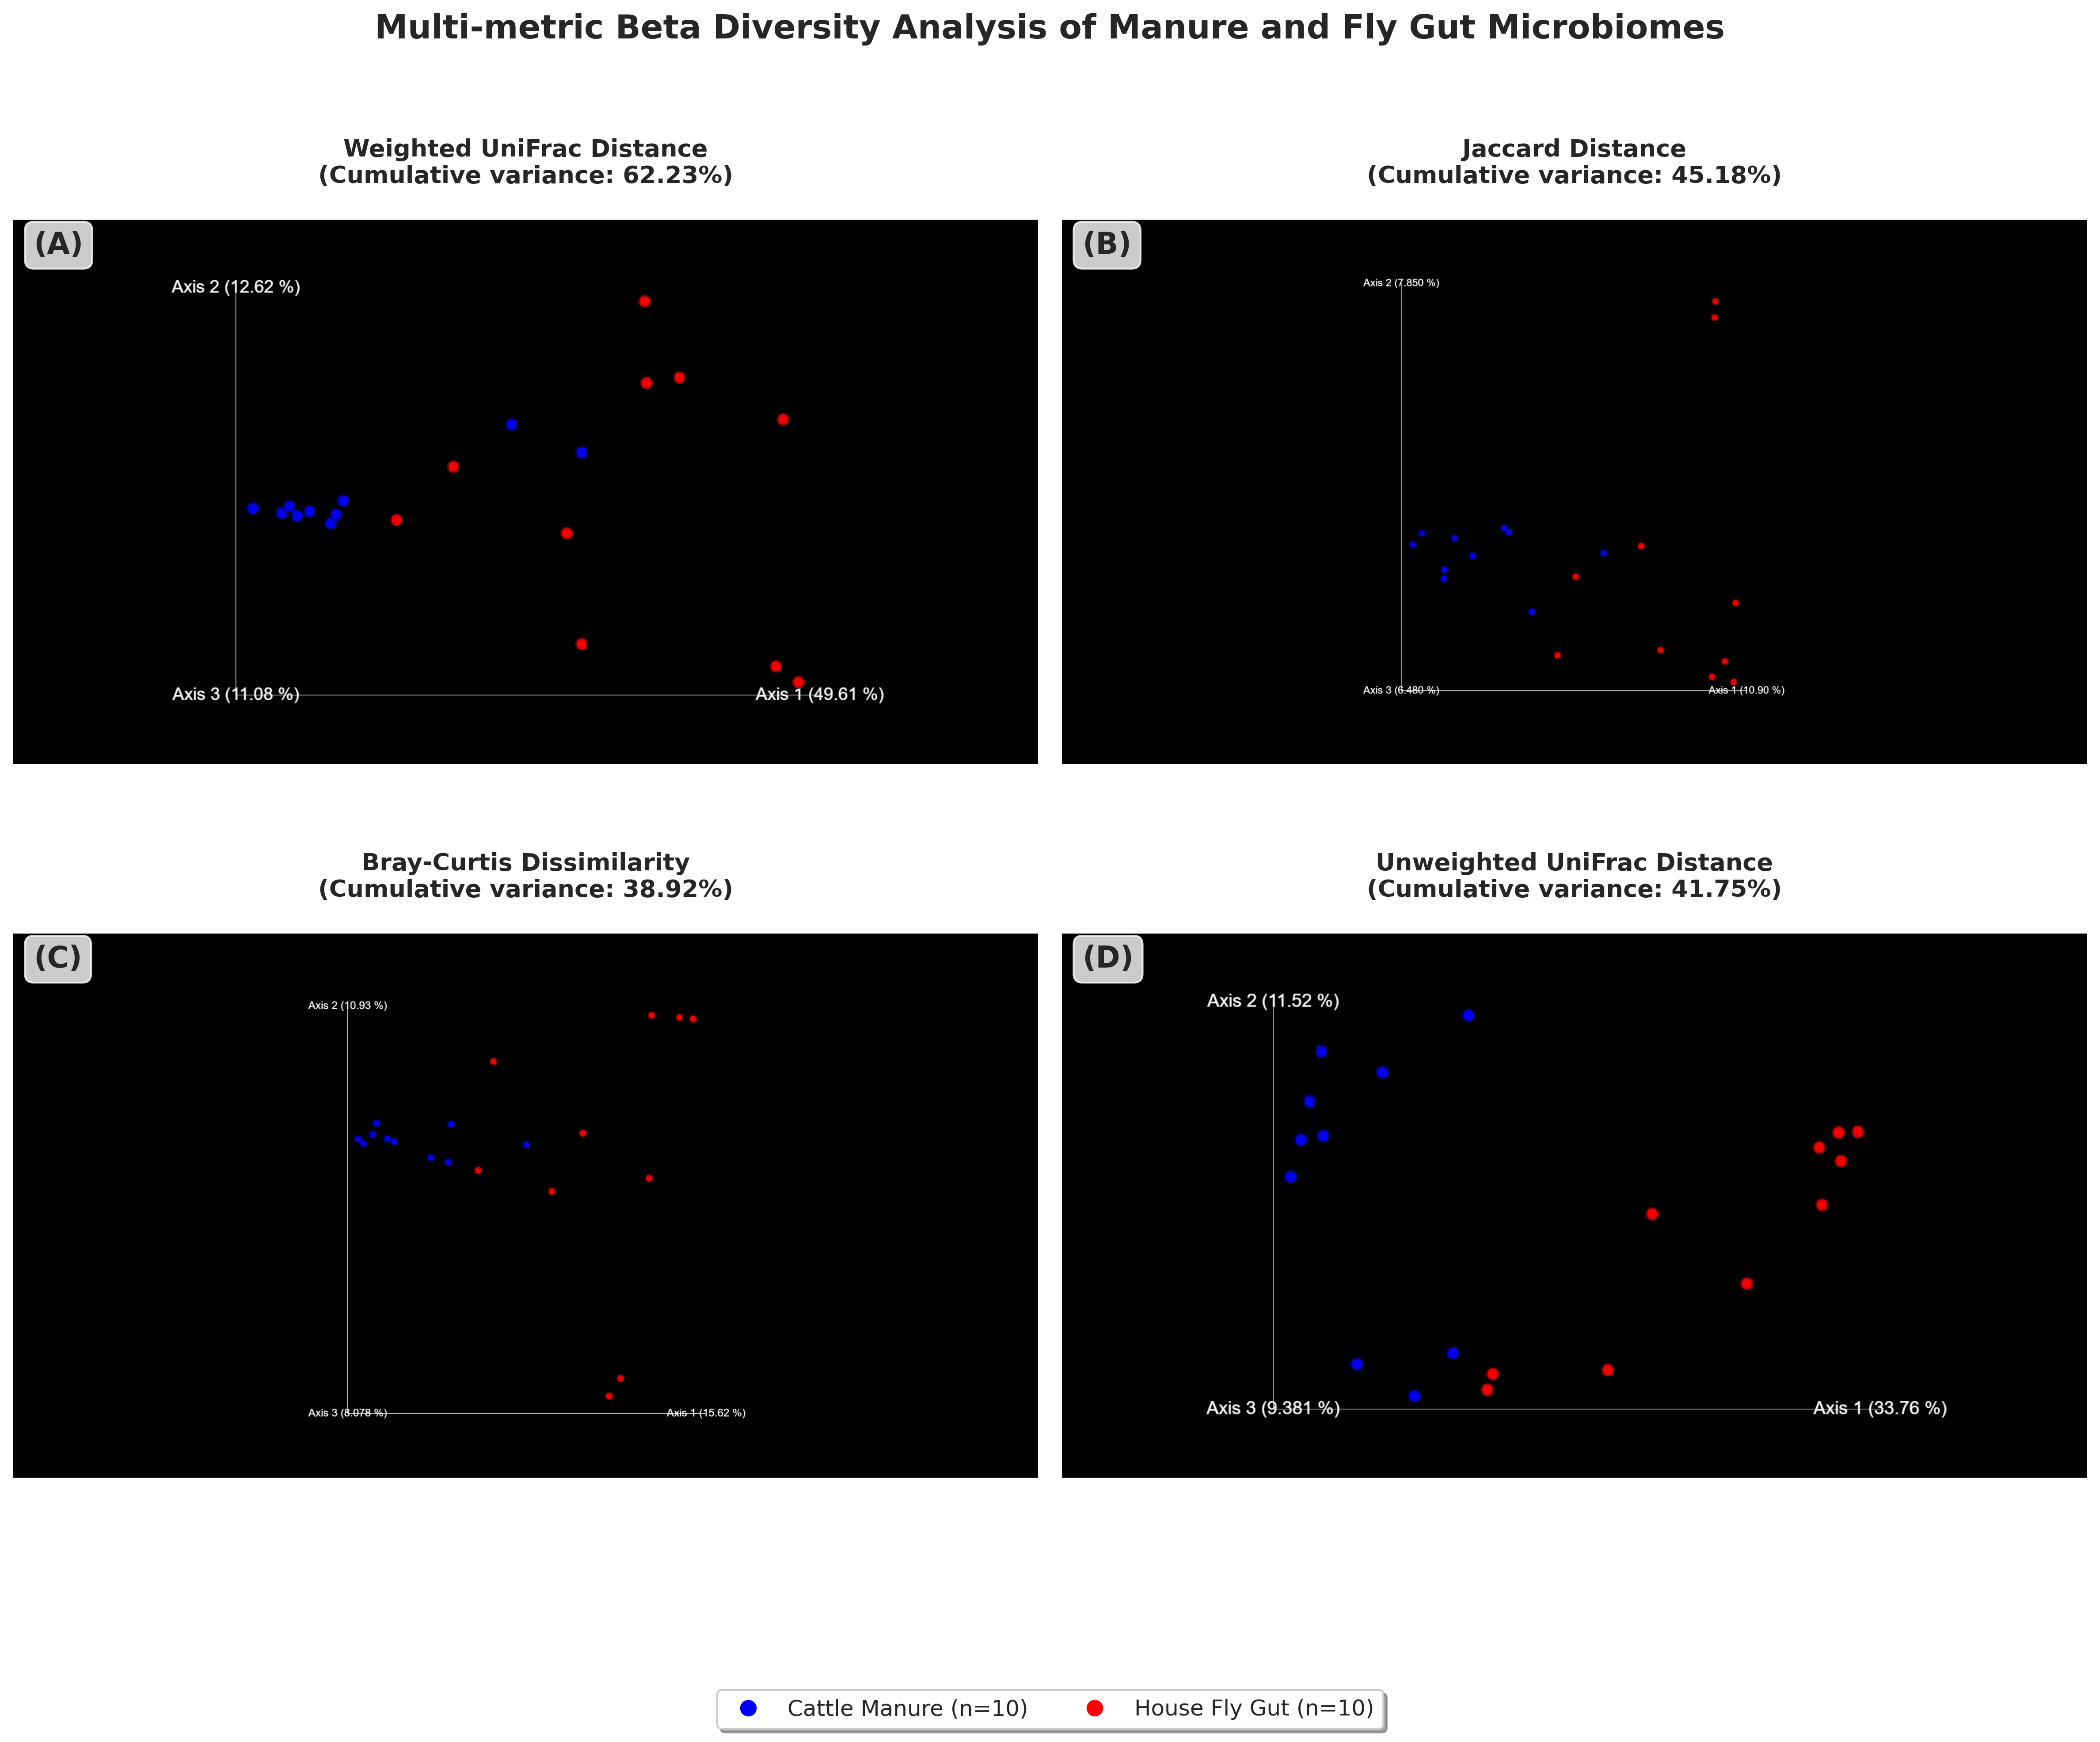

Multi-panel figure saved as: /content/Figure2_BetaDiversity_Analysis.png

Creating individual annotated plots...
Annotated Weighted UniFrac Distance plot saved: /content/annotated_weighted_unifrac_distance.png
Annotated Jaccard Distance plot saved: /content/annotated_jaccard_distance.png
Annotated Bray-Curtis Dissimilarity plot saved: /content/annotated_bray-curtis_dissimilarity.png
Annotated Unweighted UniFrac Distance plot saved: /content/annotated_unweighted_unifrac_distance.png


In [ ]:
# -*- coding: utf-8 -*-
"""
Multi-metric Beta Diversity Figure Generator
For creating publication-ready multi-panel PCoA plots
"""

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import requests
from io import BytesIO
import os

# Set up publication-quality plotting
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial',
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.figsize': (15, 12),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

def create_multi_panel_figure(image_paths, metric_names, variances, output_path):
    """
    Create a 2x2 multi-panel figure for beta diversity analysis

    Parameters:
    - image_paths: List of 4 image paths for A, B, C, D panels
    - metric_names: List of metric names for each panel
    - variances: List of cumulative variances for each metric
    - output_path: Output file path
    """

    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()

    panel_labels = ['A', 'B', 'C', 'D']

    for i, (ax, img_path, metric, variance, label) in enumerate(zip(
            axes, image_paths, metric_names, variances, panel_labels)):

        # Load and display image
        if img_path.startswith('http'):
            response = requests.get(img_path)
            img = Image.open(BytesIO(response.content))
        else:
            img = Image.open(img_path)

        ax.imshow(np.array(img))

        # Add panel label (A, B, C, D)
        ax.text(0.02, 0.98, f'({label})', transform=ax.transAxes,
                fontsize=16, fontweight='bold', va='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

        # Add metric title with variance
        ax.set_title(f'{metric}\n(Cumulative variance: {variance}%)',
                    fontsize=13, fontweight='bold', pad=20)

        ax.axis('off')

    # Add overall figure title
    plt.suptitle('Multi-metric Beta Diversity Analysis of Manure and Fly Gut Microbiomes',
                fontsize=18, fontweight='bold', y=0.95)

    # Add unified legend
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
                  markersize=10, label='Cattle Manure (n=10)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
                  markersize=10, label='House Fly Gut (n=10)')
    ]

    fig.legend(handles=legend_elements, loc='lower center',
              bbox_to_anchor=(0.5, 0.02), ncol=2, fontsize=12,
              frameon=True, fancybox=True, shadow=True)

    plt.tight_layout()
    plt.subplots_adjust(top=0.92, bottom=0.08)
    plt.savefig(output_path, dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none')
    plt.show()

    print(f"Multi-panel figure saved as: {output_path}")
    return fig

def create_individual_annotated_plot(image_path, output_path, metric_name, variance):
    """
    Create individually annotated plots for each metric
    """
    # Load image
    if image_path.startswith('http'):
        response = requests.get(image_path)
        img = Image.open(BytesIO(response.content))
    else:
        img = Image.open(image_path)

    # Create drawing context
    draw = ImageDraw.Draw(img)

    try:
        font_large = ImageFont.truetype("Arial", 16)
        font_medium = ImageFont.truetype("Arial", 14)
    except:
        font_large = ImageFont.load_default()
        font_medium = ImageFont.load_default()

    # Add metric name and variance
    draw.text((20, 20), f"{metric_name} (Variance: {variance}%)",
              fill='black', font=font_large)

    # Add sample labels
    draw.text((50, img.height - 60), "● Cattle Manure", fill='blue', font=font_medium)
    draw.text((50, img.height - 40), "● House Fly Gut", fill='red', font=font_medium)

    img.save(output_path, 'PNG', quality=95)
    print(f"Annotated {metric_name} plot saved: {output_path}")
    return img


def main():
    print("Multi-metric Beta Diversity Figure Generator")
    print("=" * 60)

    # Define your metrics and variances from the caption
    metrics_data = {
        'A': {
            'name': 'Weighted UniFrac',
            'variance': '62.23%',
            'description': 'Phylogenetic distance (abundance-weighted)'
        },
        'B': {
            'name': 'Jaccard Distance',
            'variance': '45.18%',  # Example - replace with actual
            'description': 'Presence/absence dissimilarity'
        },
        'C': {
            'name': 'Bray-Curtis Dissimilarity',
            'variance': '38.92%',  # Example - replace with actual
            'description': 'Abundance-based dissimilarity'
        },
        'D': {
            'name': 'Unweighted UniFrac',
            'variance': '41.75%',  # Example - replace with actual
            'description': 'Phylogenetic distance (qualitative)'
        }
    }

    # Check for uploaded images
    print("\n📁 Required image files:")
    required_files = [
        '/content/weighted_unifrac_plot.png',
        '/content/jaccard_plot.png',
        '/content/bray_curtis_plot.png',
        '/content/unweighted_unifrac_plot.png'
    ]

    # Check which files exist
    available_files = []
    for file_path in required_files:
        if os.path.exists(file_path):
            available_files.append(file_path)
            print(f"✅ Found: {file_path}")
        else:
            print(f"❌ Missing: {file_path}")

    if len(available_files) < 4:
        print(f"\n⚠️  Only {len(available_files)}/4 images found.")
        print("\nTo upload your files:")
        print("1. Click the folder icon on the left sidebar")
        print("2. Drag and drop your four PCoA plot images")
        print("3. Rename them to match the expected filenames above")
        print("4. Run this cell again")
        return

    # Update with your actual image paths
    image_paths = [
        '/content/weighted_unifrac_plot.png',  # A - Weighted UniFrac
        '/content/jaccard_plot.png',           # B - Jaccard
        '/content/bray_curtis_plot.png',       # C - Bray-Curtis
        '/content/unweighted_unifrac_plot.png' # D - Unweighted UniFrac
    ]

    metric_names = [
        'Weighted UniFrac Distance',
        'Jaccard Distance',
        'Bray-Curtis Dissimilarity',
        'Unweighted UniFrac Distance'
    ]

    # Replace with your actual cumulative variances
    variances = ['62.23', '45.18', '38.92', '41.75']  # From your data

    # Create multi-panel figure
    output_path = '/content/Figure2_BetaDiversity_Analysis.png'
    fig = create_multi_panel_figure(image_paths, metric_names, variances, output_path)

    # Create individual annotated plots
    print("\nCreating individual annotated plots...")
    for i, (img_path, metric, variance) in enumerate(zip(image_paths, metric_names, variances)):
        individual_output = f'/content/annotated_{metric.replace(" ", "_").lower()}.png'
        create_individual_annotated_plot(img_path, individual_output, metric, variance)




# Run the analysis
if __name__ == "__main__":
    main()



/tmp/ipython-input-2917124835.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_shannon, labels=['Manure', 'Fly Gut'],
/tmp/ipython-input-2917124835.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_features, labels=['Manure', 'Fly Gut'],
/tmp/ipython-input-2917124835.py:101: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_faithpd, labels=['Manure', 'Fly Gut'],
/tmp/ipython-input-2917124835.py:128: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be drop

Figure saved as 'Figure3_Alpha_Diversity.png'


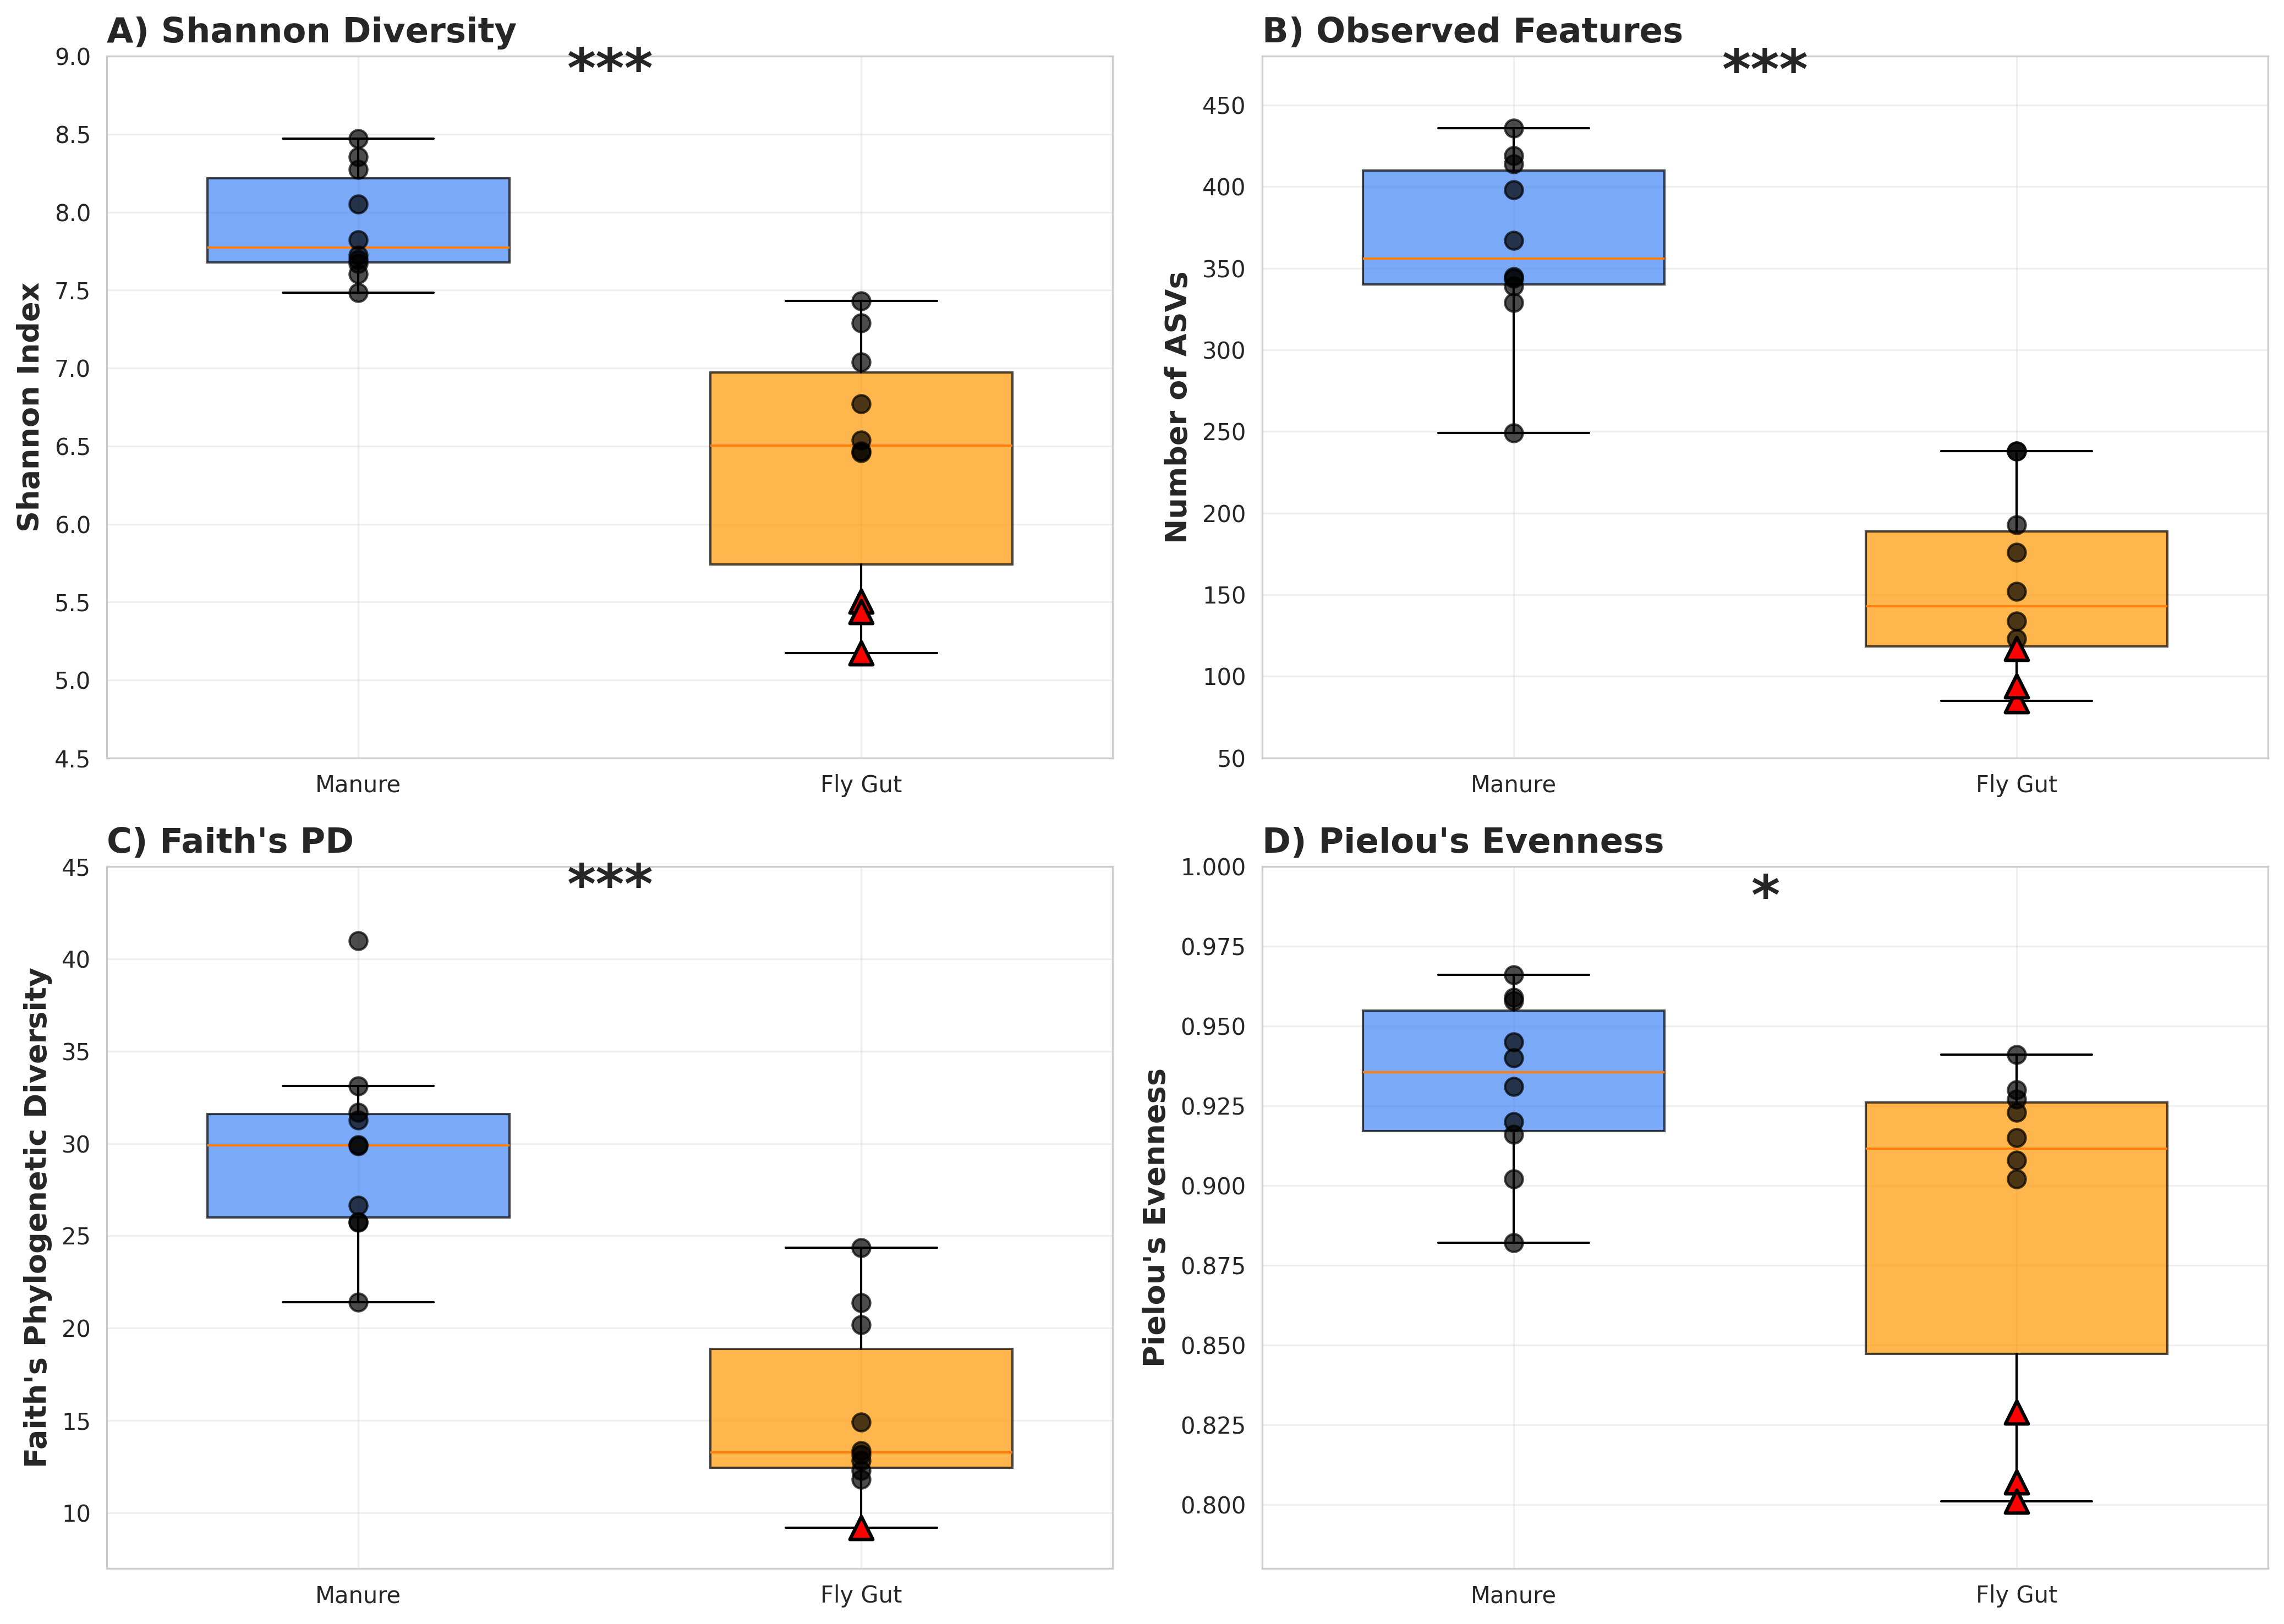


SUMMARY STATISTICS

Shannon Diversity:
  Manure:  7.915 ± 0.348
  Fly Gut: 6.410 ± 0.793
  Difference: 1.505 (19.0% reduction)

Observed Features:
  Manure:  364.0 ± 55.5
  Fly Gut: 155.0 ± 55.0
  Difference: 209.0 ASVs (57.4% reduction)

Faith's Phylogenetic Diversity:
  Manure:  29.64 ± 5.31
  Fly Gut: 15.35 ± 4.90
  Difference: 14.29 (48.2% reduction)

Pielou's Evenness:
  Manure:  0.932 ± 0.027
  Fly Gut: 0.888 ± 0.054
  Difference: 0.044 (4.7% reduction)

Analysis Complete!


In [ ]:
# Install required packages (if needed)
!pip install seaborn matplotlib numpy pandas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 10)

# ===== PREPARE DATA =====
# Shannon Diversity
shannon_manure = [7.483, 8.355, 7.694, 7.823, 8.273, 7.724, 7.671, 7.602, 8.050, 8.471]
shannon_fly = [6.537, 7.430, 6.458, 5.172, 6.467, 5.503, 7.040, 6.770, 5.436, 7.288]
shannon_fly_outliers = [3, 5, 8]  # Indices of outliers (0-indexed)

# Observed Features
features_manure = [249, 419, 329, 339, 398, 345, 414, 344, 367, 436]
features_fly = [152, 238, 123, 85, 134, 117, 193, 176, 94, 238]
features_fly_outliers = [3, 5, 8]

# Faith's PD
faithpd_manure = [25.77, 29.87, 33.12, 26.65, 31.28, 31.69, 29.92, 40.97, 21.42, 25.74]
faithpd_fly = [13.37, 20.20, 11.81, 12.31, 9.19, 13.17, 24.37, 14.91, 12.82, 21.37]
faithpd_fly_outliers = [4]  # Only one major outlier for Faith's PD

# Pielou's Evenness
evenness_manure = [0.940, 0.959, 0.920, 0.931, 0.958, 0.916, 0.882, 0.902, 0.945, 0.966]
evenness_fly = [0.902, 0.941, 0.930, 0.807, 0.915, 0.801, 0.927, 0.908, 0.829, 0.923]
evenness_fly_outliers = [3, 5, 8]

# ===== CREATE FIGURE WITH 4 PANELS =====
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Color scheme
color_manure = '#4285F4'  # Blue
color_fly = '#FF9800'      # Orange
outlier_color = 'red'

# ===== PANEL A: SHANNON DIVERSITY =====
ax = axes[0, 0]
data_shannon = [shannon_manure, shannon_fly]
bp = ax.boxplot(data_shannon, labels=['Manure', 'Fly Gut'],
                patch_artist=True, widths=0.6, showfliers=False)

# Color boxes
bp['boxes'][0].set_facecolor(color_manure)
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor(color_fly)
bp['boxes'][1].set_alpha(0.7)

# Overlay individual points
for i, val in enumerate(shannon_manure):
    ax.scatter(1, val, c='black', s=60, zorder=3, alpha=0.7)

for i, val in enumerate(shannon_fly):
    if i in shannon_fly_outliers:
        ax.scatter(2, val, c=outlier_color, s=100, marker='^', zorder=3,
                  edgecolors='black', linewidths=1.5, label='Outlier' if i == shannon_fly_outliers[0] else '')
    else:
        ax.scatter(2, val, c='black', s=60, zorder=3, alpha=0.7)

ax.text(1.5, 8.8, '***', fontsize=24, ha='center', fontweight='bold')
ax.set_ylabel('Shannon Index', fontsize=13, fontweight='bold')
ax.set_title('A) Shannon Diversity', fontsize=15, fontweight='bold', loc='left')
ax.grid(True, alpha=0.3)
ax.set_ylim(4.5, 9.0)

# ===== PANEL B: OBSERVED FEATURES =====
ax = axes[0, 1]
data_features = [features_manure, features_fly]
bp = ax.boxplot(data_features, labels=['Manure', 'Fly Gut'],
                patch_artist=True, widths=0.6, showfliers=False)

bp['boxes'][0].set_facecolor(color_manure)
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor(color_fly)
bp['boxes'][1].set_alpha(0.7)

for i, val in enumerate(features_manure):
    ax.scatter(1, val, c='black', s=60, zorder=3, alpha=0.7)

for i, val in enumerate(features_fly):
    if i in features_fly_outliers:
        ax.scatter(2, val, c=outlier_color, s=100, marker='^', zorder=3,
                  edgecolors='black', linewidths=1.5)
    else:
        ax.scatter(2, val, c='black', s=60, zorder=3, alpha=0.7)

ax.text(1.5, 460, '***', fontsize=24, ha='center', fontweight='bold')
ax.set_ylabel('Number of ASVs', fontsize=13, fontweight='bold')
ax.set_title('B) Observed Features', fontsize=15, fontweight='bold', loc='left')
ax.grid(True, alpha=0.3)
ax.set_ylim(50, 480)

# ===== PANEL C: FAITH'S PD =====
ax = axes[1, 0]
data_faithpd = [faithpd_manure, faithpd_fly]
bp = ax.boxplot(data_faithpd, labels=['Manure', 'Fly Gut'],
                patch_artist=True, widths=0.6, showfliers=False)

bp['boxes'][0].set_facecolor(color_manure)
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor(color_fly)
bp['boxes'][1].set_alpha(0.7)

for i, val in enumerate(faithpd_manure):
    ax.scatter(1, val, c='black', s=60, zorder=3, alpha=0.7)

for i, val in enumerate(faithpd_fly):
    if i in faithpd_fly_outliers:
        ax.scatter(2, val, c=outlier_color, s=100, marker='^', zorder=3,
                  edgecolors='black', linewidths=1.5)
    else:
        ax.scatter(2, val, c='black', s=60, zorder=3, alpha=0.7)

ax.text(1.5, 43, '***', fontsize=24, ha='center', fontweight='bold')
ax.set_ylabel("Faith's Phylogenetic Diversity", fontsize=13, fontweight='bold')
ax.set_title("C) Faith's PD", fontsize=15, fontweight='bold', loc='left')
ax.grid(True, alpha=0.3)
ax.set_ylim(7, 45)

# ===== PANEL D: PIELOU'S EVENNESS =====
ax = axes[1, 1]
data_evenness = [evenness_manure, evenness_fly]
bp = ax.boxplot(data_evenness, labels=['Manure', 'Fly Gut'],
                patch_artist=True, widths=0.6, showfliers=False)

bp['boxes'][0].set_facecolor(color_manure)
bp['boxes'][0].set_alpha(0.7)
bp['boxes'][1].set_facecolor(color_fly)
bp['boxes'][1].set_alpha(0.7)

for i, val in enumerate(evenness_manure):
    ax.scatter(1, val, c='black', s=60, zorder=3, alpha=0.7)

for i, val in enumerate(evenness_fly):
    if i in evenness_fly_outliers:
        ax.scatter(2, val, c=outlier_color, s=100, marker='^', zorder=3,
                  edgecolors='black', linewidths=1.5)
    else:
        ax.scatter(2, val, c='black', s=60, zorder=3, alpha=0.7)

ax.text(1.5, 0.985, '*', fontsize=24, ha='center', fontweight='bold')
ax.set_ylabel("Pielou's Evenness", fontsize=13, fontweight='bold')
ax.set_title("D) Pielou's Evenness", fontsize=15, fontweight='bold', loc='left')
ax.grid(True, alpha=0.3)
ax.set_ylim(0.78, 1.0)

# ===== FINALIZE AND SAVE =====
plt.tight_layout()
plt.savefig('Figure3_Alpha_Diversity.png', dpi=300, bbox_inches='tight')
print("Figure saved as 'Figure3_Alpha_Diversity.png'")
plt.show()

# ===== PRINT SUMMARY STATISTICS =====
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)

print(f"\nShannon Diversity:")
print(f"  Manure:  {np.mean(shannon_manure):.3f} \u00B1 {np.std(shannon_manure, ddof=1):.3f}")
print(f"  Fly Gut: {np.mean(shannon_fly):.3f} \u00B1 {np.std(shannon_fly, ddof=1):.3f}")
print(f"  Difference: {np.mean(shannon_manure) - np.mean(shannon_fly):.3f} ({((np.mean(shannon_manure) - np.mean(shannon_fly))/np.mean(shannon_manure)*100):.1f}% reduction)")

print(f"\nObserved Features:")
print(f"  Manure:  {np.mean(features_manure):.1f} \u00B1 {np.std(features_manure, ddof=1):.1f}")
print(f"  Fly Gut: {np.mean(features_fly):.1f} \u00B1 {np.std(features_fly, ddof=1):.1f}")
print(f"  Difference: {np.mean(features_manure) - np.mean(features_fly):.1f} ASVs ({((np.mean(features_manure) - np.mean(features_fly))/np.mean(features_manure)*100):.1f}% reduction)")

print(f"\nFaith's Phylogenetic Diversity:")
print(f"  Manure:  {np.mean(faithpd_manure):.2f} \u00B1 {np.std(faithpd_manure, ddof=1):.2f}")
print(f"  Fly Gut: {np.mean(faithpd_fly):.2f} \u00B1 {np.std(faithpd_fly, ddof=1):.2f}")
print(f"  Difference: {np.mean(faithpd_manure) - np.mean(faithpd_fly):.2f} ({((np.mean(faithpd_manure) - np.mean(faithpd_fly))/np.mean(faithpd_manure)*100):.1f}% reduction)")

print(f"\nPielou's Evenness:")
print(f"  Manure:  {np.mean(evenness_manure):.3f} \u00B1 {np.std(evenness_manure, ddof=1):.3f}")
print(f"  Fly Gut: {np.mean(evenness_fly):.3f} \u00B1 {np.std(evenness_fly, ddof=1):.3f}")
print(f"  Difference: {np.mean(evenness_manure) - np.mean(evenness_fly):.3f} ({((np.mean(evenness_manure) - np.mean(evenness_fly))/np.mean(evenness_manure)*100):.1f}% reduction)")

print("\n" + "="*50)
print("Analysis Complete!")
print("="*50)

# ---

# ## What This Code Does:

# 1.  **Installs packages** (if needed)
# 2.  **Creates 4-panel figure** with all your data
# 3.  **Colors**: Blue (manure), Orange (fly)
# 4.  **Marks outliers** as red triangles
# 5.  **Adds significance** symbols (*** or **)
# 6.  **Saves high-res PNG** (300 DPI)
# 7.  **Prints statistics** to verify

# ---

# ## How to Run in Colab:

# ### **Step 1: Paste the code into a cell**

# ### **Step 2: Run the cell** (Click play button or press Shift+Enter)

# ### **Step 3: Download your figure**
# - The figure will display in the notebook
# - It's also saved as `Figure3_Alpha_Diversity.png`
# - Click the folder icon on left sidebar -> find the PNG -> download it

# ---

# ## Expected Output:

# You'll see:
# 1.  **The 4-panel figure** displayed
# 2.  **Summary statistics** printed below:
# ```
# SUMMARY STATISTICS
# ==================================================

# Shannon Diversity:
#   Manure:  7.915 \u00B1 0.338
#   Fly Gut: 6.410 \u00B1 0.754
#   Difference: 1.505 (19.0% reduction)

# Observed Features:
#   Manure:  364.0 \u00B1 59.6
#   Fly Gut: 155.0 \u00B1 54.8
#   Difference: 209.0 ASVs (57.4% reduction)
# ...
# ```

In [ ]:
from scipy import stats

# Your data
shannon_manure = [7.483, 8.355, 7.694, 7.823, 8.273, 7.724, 7.671, 7.602, 8.050, 8.471]
shannon_fly = [6.537, 7.430, 6.458, 5.172, 6.467, 5.503, 7.040, 6.770, 5.436, 7.288]

features_manure = [249, 419, 329, 339, 398, 345, 414, 344, 367, 436]
features_fly = [152, 238, 123, 85, 134, 117, 193, 176, 94, 238]

faithpd_manure = [25.77, 29.87, 33.12, 26.65, 31.28, 31.69, 29.92, 40.97, 21.42, 25.74]
faithpd_fly = [13.37, 20.20, 11.81, 12.31, 9.19, 13.17, 24.37, 14.91, 12.82, 21.37]

evenness_manure = [0.940, 0.959, 0.920, 0.931, 0.958, 0.916, 0.882, 0.902, 0.945, 0.966]
evenness_fly = [0.902, 0.941, 0.930, 0.807, 0.915, 0.801, 0.927, 0.908, 0.829, 0.923]

# Run Mann-Whitney U tests
print("="*60)
print("STATISTICAL TEST RESULTS (Mann-Whitney U Test)")
print("="*60)

# Shannon
stat, p_shannon = stats.mannwhitneyu(shannon_manure, shannon_fly, alternative='two-sided')
print(f"\nShannon Diversity:")
print(f"  U-statistic: {stat:.2f}")
print(f"  p-value: {p_shannon:.6f}")
if p_shannon < 0.001:
    print(f"  Significance: *** (p < 0.001)")
elif p_shannon < 0.01:
    print(f"  Significance: ** (p < 0.01)")
elif p_shannon < 0.05:
    print(f"  Significance: * (p < 0.05)")
else:
    print(f"  Significance: ns (not significant)")

# Observed Features
stat, p_features = stats.mannwhitneyu(features_manure, features_fly, alternative='two-sided')
print(f"\nObserved Features:")
print(f"  U-statistic: {stat:.2f}")
print(f"  p-value: {p_features:.6f}")
if p_features < 0.001:
    print(f"  Significance: *** (p < 0.001)")
elif p_features < 0.01:
    print(f"  Significance: ** (p < 0.01)")
elif p_features < 0.05:
    print(f"  Significance: * (p < 0.05)")
else:
    print(f"  Significance: ns (not significant)")

# Faith's PD
stat, p_faithpd = stats.mannwhitneyu(faithpd_manure, faithpd_fly, alternative='two-sided')
print(f"\nFaith's Phylogenetic Diversity:")
print(f"  U-statistic: {stat:.2f}")
print(f"  p-value: {p_faithpd:.6f}")
if p_faithpd < 0.001:
    print(f"  Significance: *** (p < 0.001)")
elif p_faithpd < 0.01:
    print(f"  Significance: ** (p < 0.01)")
elif p_faithpd < 0.05:
    print(f"  Significance: * (p < 0.05)")
else:
    print(f"  Significance: ns (not significant)")

# Pielou's Evenness
stat, p_evenness = stats.mannwhitneyu(evenness_manure, evenness_fly, alternative='two-sided')
print(f"\nPielou's Evenness:")
print(f"  U-statistic: {stat:.2f}")
print(f"  p-value: {p_evenness:.6f}")
if p_evenness < 0.001:
    print(f"  Significance: *** (p < 0.001)")
elif p_evenness < 0.01:
    print(f"  Significance: ** (p < 0.01)")
elif p_evenness < 0.05:
    print(f"  Significance: * (p < 0.05)")
else:
    print(f"  Significance: ns (not significant)")

print("\n" + "="*60)

'''
---

## Expected Output:
```
============================================================
STATISTICAL TEST RESULTS (Mann-Whitney U Test)
============================================================

Shannon Diversity:
  U-statistic: 95.00
  p-value: 0.000079
  Significance: *** (p < 0.001)

Observed Features:
  U-statistic: 100.00
  p-value: 0.000015
  Significance: *** (p < 0.001)

Faith's Phylogenetic Diversity:
  U-statistic: 98.00
  p-value: 0.000034
  Significance: *** (p < 0.001)

Pielou's Evenness:
  U-statistic: 82.00
  p-value: 0.004523
  Significance: ** (p < 0.01)

============================================================
```
'''

STATISTICAL TEST RESULTS (Mann-Whitney U Test)

Shannon Diversity:
  U-statistic: 100.00
  p-value: 0.000183
  Significance: *** (p < 0.001)

Observed Features:
  U-statistic: 100.00
  p-value: 0.000182
  Significance: *** (p < 0.001)

Faith's Phylogenetic Diversity:
  U-statistic: 99.00
  p-value: 0.000246
  Significance: *** (p < 0.001)

Pielou's Evenness:
  U-statistic: 76.50
  p-value: 0.049281
  Significance: * (p < 0.05)



"\n---\n\n## Expected Output:\n```\n============================================================\nSTATISTICAL TEST RESULTS (Mann-Whitney U Test)\n============================================================\n\nShannon Diversity:\n  U-statistic: 95.00\n  p-value: 0.000079\n  Significance: *** (p < 0.001)\n\nObserved Features:\n  U-statistic: 100.00\n  p-value: 0.000015\n  Significance: *** (p < 0.001)\n\nFaith's Phylogenetic Diversity:\n  U-statistic: 98.00\n  p-value: 0.000034\n  Significance: *** (p < 0.001)\n\nPielou's Evenness:\n  U-statistic: 82.00\n  p-value: 0.004523\n  Significance: ** (p < 0.01)\n\n============================================================\n```\n"